# Hello World Two Qubit System

## First Step is to Create the Circuits and Operators

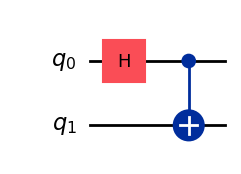

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
#hadamard gate - creates superposition
qc.h(0)
qc.cx(0,1)

qc.draw(output='mpl')


In [3]:
from qiskit.quantum_info import Pauli
#operators
ZZ = Pauli("ZZ")
ZI = Pauli("ZI")
IZ = Pauli("IZ")
XX = Pauli("XX")
XI = Pauli("XI")
IX = Pauli("IX")

observables = [ZZ, ZI, IZ, XX, XI,IX]

## Optimize Circuit Observables


In [8]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

job.result()

EstimatorResult(values=array([1.       , 0.015625 , 0.015625 , 1.       , 0.0234375, 0.0234375]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000598334, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.001469834, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 16384, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'required_memory_mb': 0, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.999755859375, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000598334, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU',

## Post Processing

Text(0, 0.5, 'Expectation')

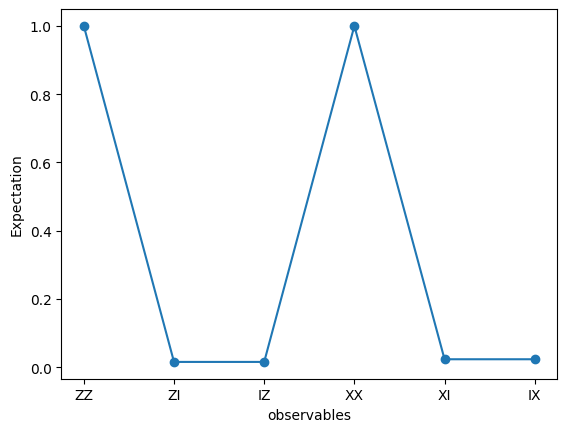

In [13]:
import matplotlib.pyplot as plt

data = ['ZZ','ZI','IZ','XX','XI','IX']
values = job.result().values

plt.plot(data,values,'-o')
plt.xlabel('observables')
plt.ylabel('Expectation')

## Extend Hello World n qubit GHZ state

In [ ]:
def get_qc(n):
    qc = QuantumCircuit(n)
    q.h